In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [9]:
# Step 2: Load Dataset
# Make sure your CSV is in the 'data/' folder
df = pd.read_csv('data.csv', encoding='latin-1')

In [10]:
# Step 3: Explore Data
print("First 5 rows:")
display(df.head())

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# Step 4: Data Cleaning
# Drop missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [14]:
# Remove canceled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [15]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [17]:

# Step 5: Feature Engineering
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

In [18]:
# Step 6: Exploratory Data Analysis (EDA)

/tmp/ipython-input-3507494982.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


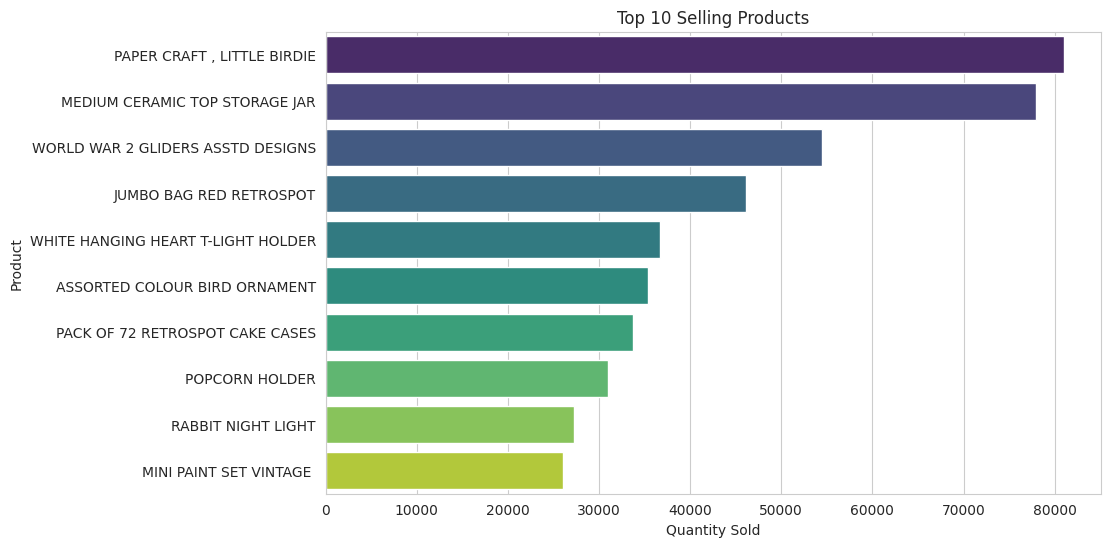

In [19]:
# 6a. Top 10 Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

/tmp/ipython-input-1580532306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_country.values, y=sales_country.index, palette='magma')


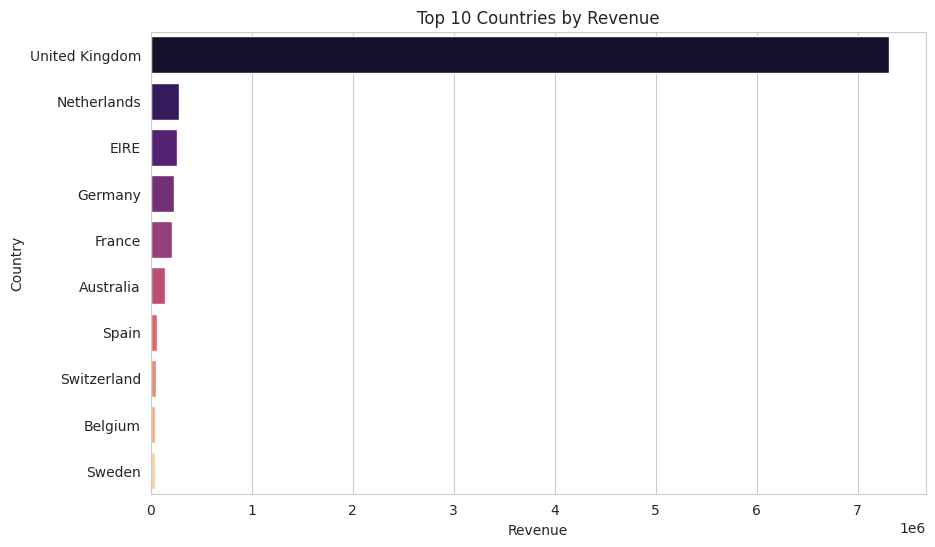

In [20]:
# 6b. Top 10 Countries by Revenue
sales_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=sales_country.values, y=sales_country.index, palette='magma')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()

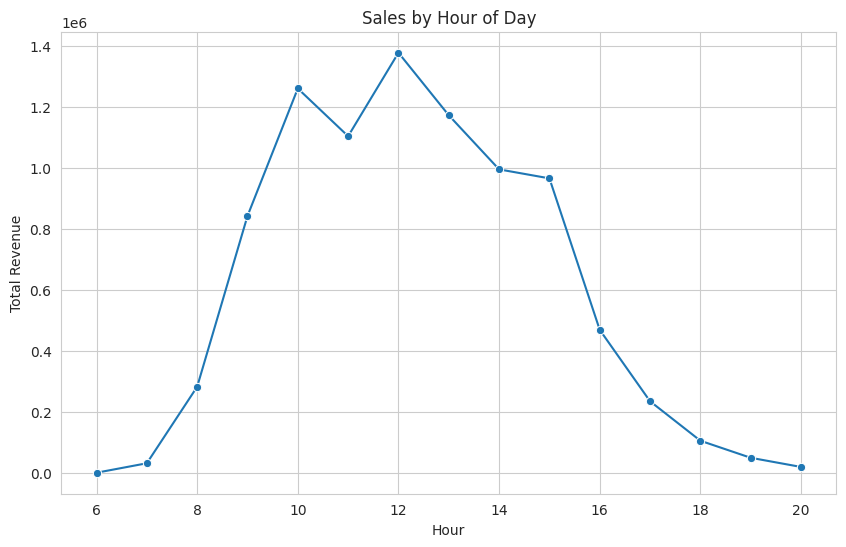

In [21]:
# 6c. Sales by Hour of Day
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.show()

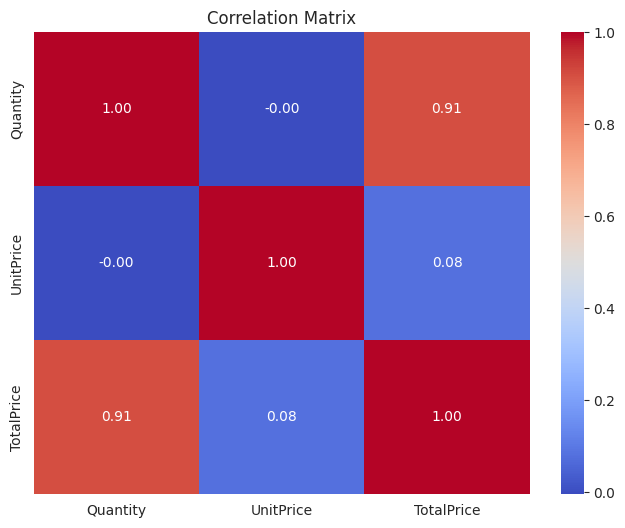

In [22]:
# 6d. Correlation Matrix
corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Step 7: Conversion Analysis (Proxy)
# Define unique customers as 'converting visitors'
total_customers = df['CustomerID'].nunique()
total_orders = df['InvoiceNo'].nunique()
conversion_rate = (total_orders / total_customers) * 100
print(f"Total Customers: {total_customers}")
print(f"Total Orders: {total_orders}")
print(f"Estimated Conversion Rate: {conversion_rate:.2f}%")

Total Customers: 4339
Total Orders: 18536
Estimated Conversion Rate: 427.20%


In [24]:
# Step 8: Cohort Analysis Example
# Group by first purchase month
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
cohort_data = df.groupby(['CohortMonth', 'YearMonth'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='YearMonth', values='CustomerID')
print("Cohort Analysis Table:")
display(cohort_pivot)

Cohort Analysis Table:


YearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,NaN,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0
2011-02,NaN,NaN,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0
2011-03,NaN,NaN,NaN,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0
2011-04,NaN,NaN,NaN,NaN,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0
2011-05,NaN,NaN,NaN,NaN,NaN,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,242.0,42.0,38.0,64.0,56.0,81.0,23.0
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,34.0,39.0,42.0,51.0,21.0
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,35.0,42.0,41.0,21.0


In [25]:
# Step 9: Insights & Recommendations
print("""
Sample Insights:
1. Peak sales hours are [Check your plot] — consider targeted promotions.
2. Top-selling products are [Check top_products] — bundle or cross-sell.
3. Countries with low sales may require localization or marketing campaigns.
4. Conversion rate proxy shows potential for improvement with targeted engagement.
""")


Sample Insights:
1. Peak sales hours are [Check your plot] — consider targeted promotions.
2. Top-selling products are [Check top_products] — bundle or cross-sell.
3. Countries with low sales may require localization or marketing campaigns.
4. Conversion rate proxy shows potential for improvement with targeted engagement.

